In [32]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [33]:
#LOAD DATASET (data is already cleaned from notebook.ipynb)
song_df = pd.read_csv("processed_song_data.csv")

song_df.head()

,Track Name,Artist Name(s),Album Name,Album Artist Name(s),Explicit,age,artist_name,dating,family/gospel,genre,...,feelings,light/visual_perceptions,like/girls,movement/places,music,obscene,sadness,shake_the_audience,mood_%,mood
0,Justified & Ancient - Stand by the Jams,The KLF,Songs Collection,The KLF,False,1.0,mukesh,0.000598,0.048857,pop,...,0.117175,0.000598,0.000598,0.000598,0.039288,0.000598,0.380299,0.000598,0.426354,Neutral
1,I Know You Want Me (Calle Ocho),Pitbull,Pitbull Starring In Rebelution,Pitbull,False,1.0,'frankie laine',0.035537,0.027007,pop,...,0.001284,0.212681,0.001284,0.001284,0.118034,0.001284,0.001284,0.001284,0.770510,High Emotion
2,From the Bottom of My Broken Heart,Britney Spears,...Baby One More Time (Digital Deluxe Version),Britney Spears,False,1.0,'johnnie ray',0.002770,0.002770,pop,...,0.225422,0.002770,0.002770,0.002770,0.323794,0.002770,0.002770,0.002770,0.683601,High Emotion
3,Apeman - 2014 Remastered Version,The Kinks,"Lola vs. Powerman and the Moneygoround, Pt. On...",The Kinks,False,1.0,'prez prado',0.048249,0.001548,pop,...,0.001548,0.001548,0.081132,0.129250,0.001548,0.001548,0.225889,0.021500,0.604193,High Emotion
4,You Can't Always Get What You Want,The Rolling Stones,Let It Bleed,The Rolling Stones,False,1.0,'giorgos papadopoulos',0.001350,0.001350,pop,...,0.001350,0.001350,0.001350,0.001350,0.001350,0.001350,0.068800,0.001350,0.523334,Neutral


In [34]:
# Step 4: Feature Extraction
# split data into features and labels.
song_X = song_df.drop(columns=[
    # these are y variables
    'mood', 'mood_%',
    # these are too specific and may lead to overfitting
    'Track Name', 'Artist Name(s)', 'Album Name', 'Album Artist Name(s)', 'artist_name', 'track_name',
    # these are directly used to calculate mood, so to prevent data leakage we will drop them
    "Energy", "Valence", "sadness"
])

song_y = song_df['mood']

In [35]:
# encode labels

# Select categorical columns
categorical_columns = ["genre", "topic"]
categorical_features = song_X[categorical_columns]

# OneHotEncode categorical features
onehot_encoder = OneHotEncoder(sparse=False, drop='first', handle_unknown='error')
onehot_encoded_features = onehot_encoder.fit_transform(categorical_features)

one_hot_encoded_df = pd.DataFrame(onehot_encoded_features,
                                  columns=onehot_encoder.get_feature_names_out(categorical_columns))

one_hot_encoded_df.head()

,genre_blues,genre_country,genre_jazz,genre_pop,genre_reggae,genre_rock,topic_music,topic_night/time,topic_obscene,topic_romantic,topic_sadness,topic_violence,topic_world/life
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [36]:
# Scale numerical features with Robust Scaler to prevent outliers
# Select numerical columns
numerical_columns = song_X.drop(columns=categorical_columns)

# scale features
robust_scaler = RobustScaler()
scaled_numerical_song_X = robust_scaler.fit_transform(numerical_columns)

# add scaled features back to dataset
song_df_scaled = pd.DataFrame(scaled_numerical_song_X, columns=numerical_columns.columns)

song_df_scaled.head()

,Explicit,age,dating,family/gospel,night/time,romantic,violence,world/life,Danceability,Key,...,Tempo,communication,family/spirtual,feelings,light/visual_perceptions,like/girls,movement/places,music,obscene,shake_the_audience
0,0.0,1.354839,-0.304616,13.753176,-0.020203,0.388631,0.325838,-0.021807,0.009088,2.831565,...,-10.050823,2.019382,-0.046505,3.715431,-0.020727,-0.036869,-0.021489,0.651982,-0.012583,-0.083452
1,0.0,1.354839,12.015053,7.412837,-0.009395,-0.010446,0.501583,2.284810,0.217088,-3.168435,...,5.536177,-0.010424,2.090158,-0.015152,3.409123,-0.011510,-0.008092,2.022035,-0.005493,-0.026053
2,0.0,1.354839,0.461240,0.379585,0.014036,3.956966,0.001404,-0.010494,0.069088,1.831565,...,-46.527823,1.918204,0.045345,7.199923,0.014399,0.043467,0.020954,5.601954,0.009878,0.098386
3,0.0,1.354839,16.497359,0.024956,-0.005229,10.338176,-0.005099,-0.016859,0.075088,3.831565,...,-46.197823,-0.008380,-0.006335,-0.006644,-0.005364,2.941837,2.492491,-0.004644,-0.002760,1.666475
4,0.0,1.354839,-0.039654,-0.032634,-0.008358,11.647211,-0.006155,2.151139,-0.288912,-5.168435,...,-35.690823,-0.009915,1.186473,-0.013032,-0.008574,-0.009075,-0.006805,-0.008096,-0.004812,-0.020542


In [37]:
# combine scaled numerical features and onehot encoded features
processed_song_X = pd.concat([song_df_scaled, one_hot_encoded_df], axis=1)
print(processed_song_X.shape)
processed_song_X.head()

(27866, 38)


,Explicit,age,dating,family/gospel,night/time,romantic,violence,world/life,Danceability,Key,...,genre_pop,genre_reggae,genre_rock,topic_music,topic_night/time,topic_obscene,topic_romantic,topic_sadness,topic_violence,topic_world/life
0,0.0,1.354839,-0.304616,13.753176,-0.020203,0.388631,0.325838,-0.021807,0.009088,2.831565,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,1.354839,12.015053,7.412837,-0.009395,-0.010446,0.501583,2.284810,0.217088,-3.168435,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,1.354839,0.461240,0.379585,0.014036,3.956966,0.001404,-0.010494,0.069088,1.831565,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.354839,16.497359,0.024956,-0.005229,10.338176,-0.005099,-0.016859,0.075088,3.831565,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,1.354839,-0.039654,-0.032634,-0.008358,11.647211,-0.006155,2.151139,-0.288912,-5.168435,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [38]:
LABELS = ["High Emotion", "Neutral", "Low Emotion"]

In [39]:
# Split the dataset into training (60%), validation (20%), and test (20%) sets

X_train, X_test, y_train, y_test = train_test_split(processed_song_X, song_y, test_size=0.2, random_state=42,
                                                    stratify=song_y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42, stratify=y_train)

# Overall Performance of the Models

In [40]:
from sklearn.metrics import accuracy_score

In [41]:
import os
import pickle
import keras

models = [i.split(".")[0] for i in os.listdir("models")]
for model in models:
    if model == "neural_network_model":
        exec(f"{model} = keras.models.load_model('models/{model}.h5')")
    else:
        with open(f"models/{model}.pkl", "rb") as f:
            exec(f"{model} = pickle.load(f)")

In [42]:
models = {i: eval(i) for i in models}

In [43]:
accuracy_scores = {}
precision_scores = {}
recall_scores = {}
f1_scores = {}

for model_name, model in models.items():
    y_pred = model.predict(X_test)
    print(model_name)
    if model_name == "neural_network_model":
        y_pred = np.argmax(y_pred, axis=1)
        y_pred = pd.Series(y_pred).replace({
            0: "High Emotion",
            1: "Neutral",
            2: "Low Emotion"
        })
    elif model_name.split("_")[0] == "xgb":
        y_pred = pd.Series(y_pred).replace({
            0: "High Emotion",
            1: "Neutral",
            2: "Low Emotion"
        })
        
    accuracy_scores[model_name] = accuracy_score(y_test, y_pred)
    precision_scores[model_name] = precision_score(y_test, y_pred, average='weighted')
    recall_scores[model_name] = recall_score(y_test, y_pred, average='weighted')
    f1_scores[model_name] = f1_score(y_test, y_pred, average='weighted')
        

gradient_boost_model
175/175 [==============================] - 0s 601us/step
neural_network_model
optimal_gradient_boost_model
oversample_gradient_boost_model
random_forest_model
smote_gradient_boost_model
svm_model
svm_model_ros
svm_model_rus
svm_model_smote
undersample_gradient_boost_model
xgb_model
xgb_ros_model
xgb_rus_model
xgb_smote_model


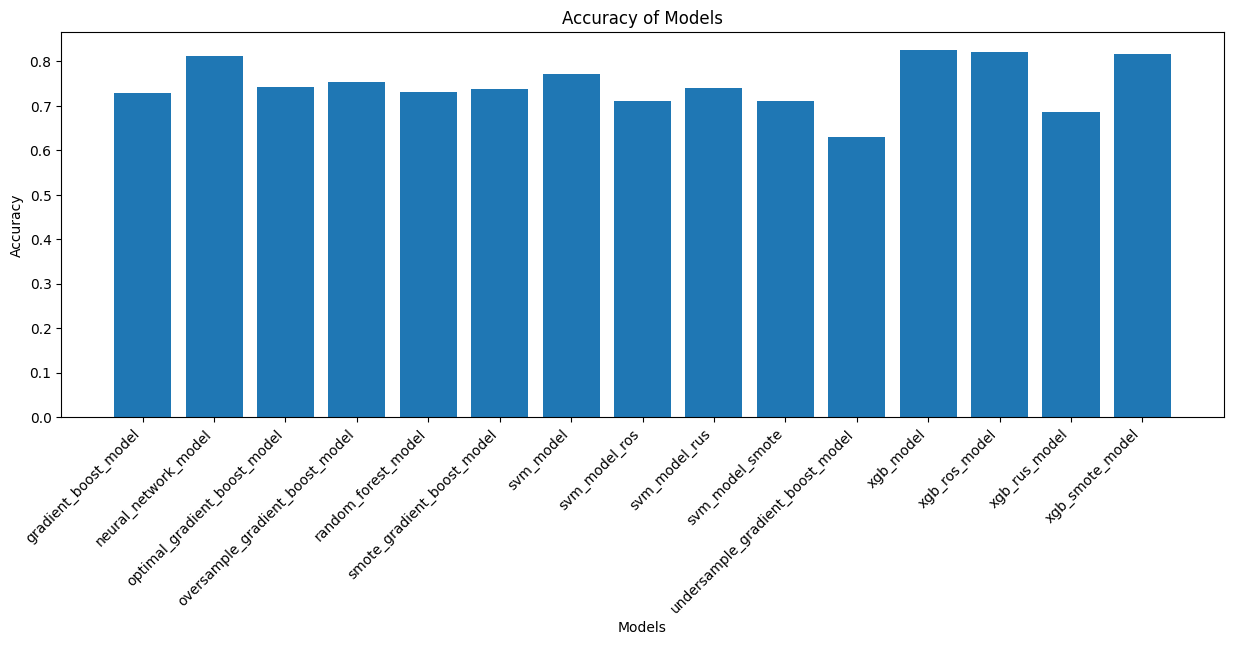

In [51]:
plt.figure(figsize=(15, 5))
plt.bar(accuracy_scores.keys(), accuracy_scores.values())
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy of Models')
plt.xticks(rotation=45, ha='right')
plt.show()

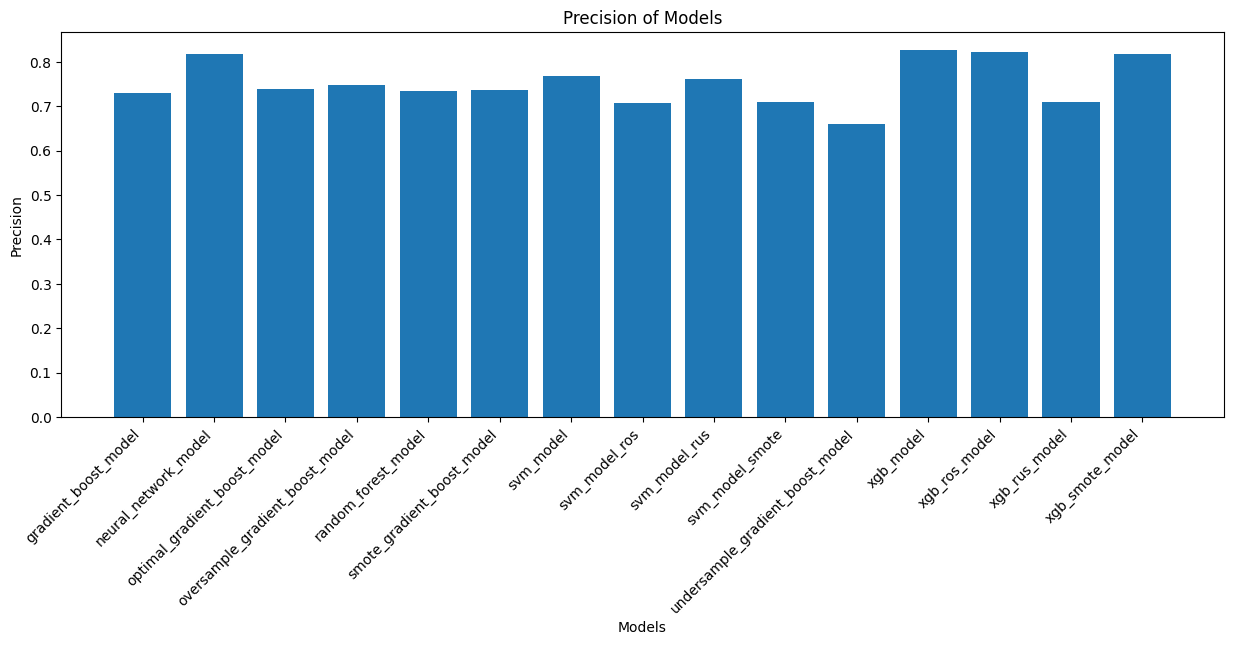

In [52]:
plt.figure(figsize=(15, 5))
plt.bar(precision_scores.keys(), precision_scores.values())
plt.xlabel('Models')
plt.ylabel('Precision')
plt.title('Precision of Models')
plt.xticks(rotation=45, ha='right')
plt.show()

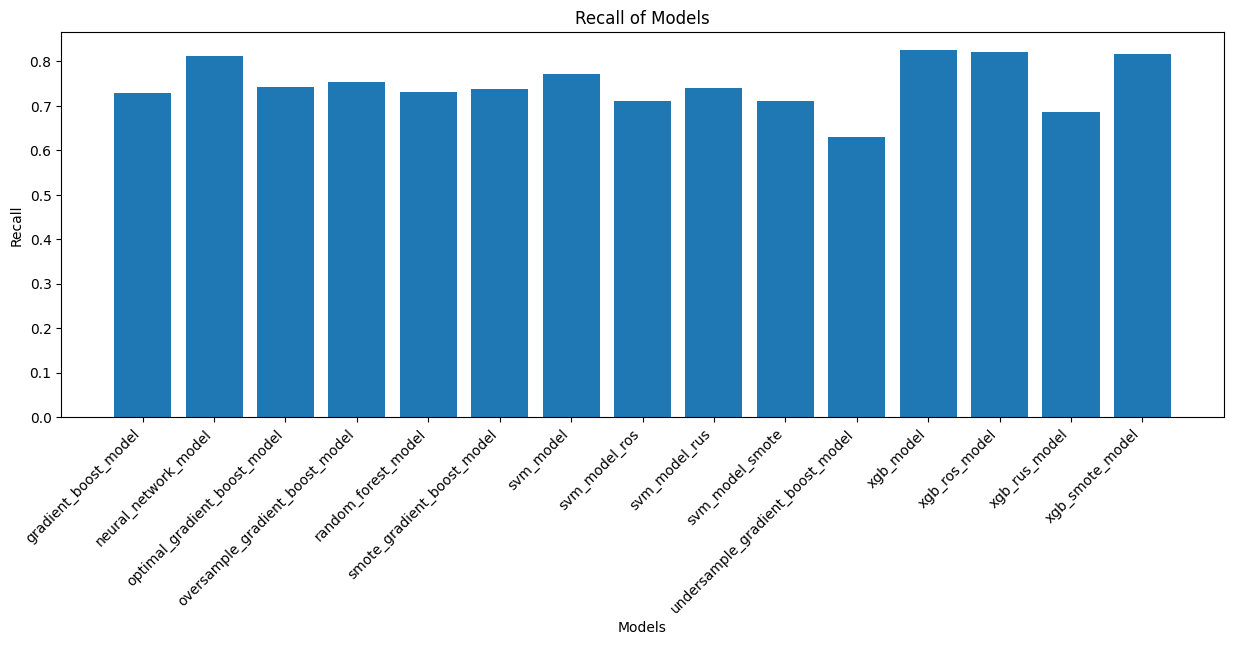

In [53]:
plt.figure(figsize=(15, 5))
plt.bar(recall_scores.keys(), recall_scores.values())
plt.xlabel('Models')
plt.ylabel('Recall')
plt.title('Recall of Models')
plt.xticks(rotation=45, ha='right')
plt.show()

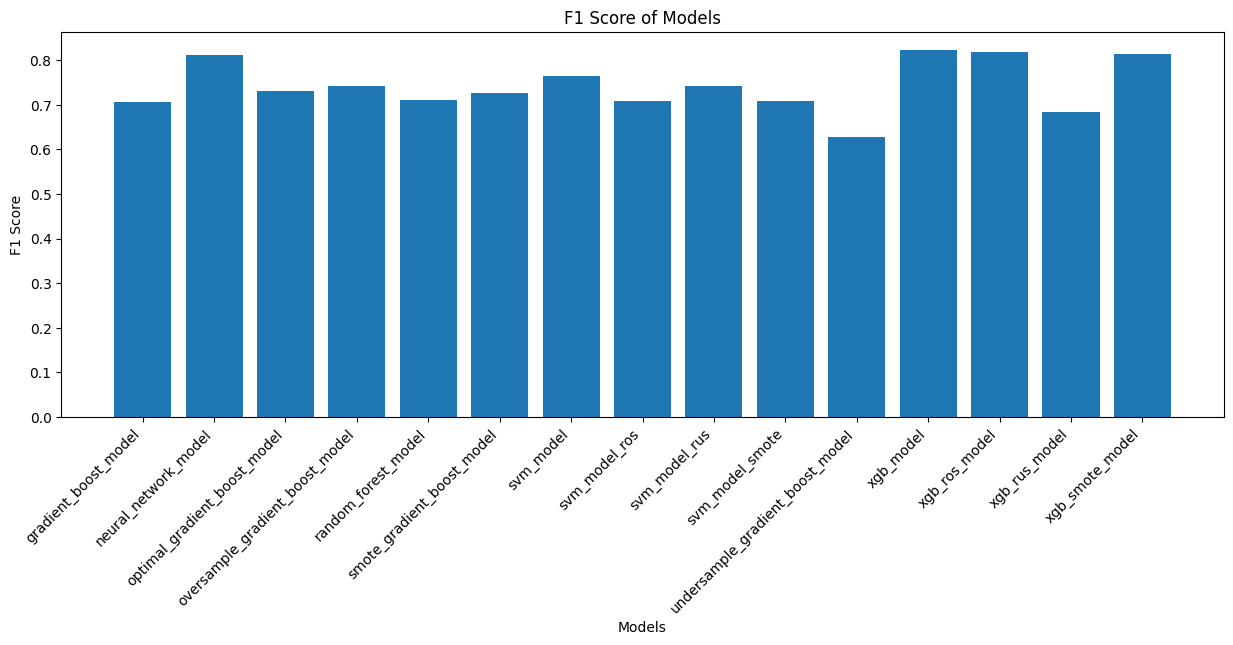

In [54]:
plt.figure(figsize=(15, 5))
plt.bar(f1_scores.keys(), f1_scores.values())
plt.xlabel('Models')
plt.ylabel('F1 Score')
plt.title('F1 Score of Models')
plt.xticks(rotation=45, ha='right')
plt.show()